In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
signal=pd.read_csv('221202_seqana_data_science_working_student_challenge_dataset.csv')

In [3]:
signal.head()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
0,2012,894,899.792969,898,892,894,895.900574,0.306919,-4,183,...,3374.608696,1089.260870,1546.869565,1574.503874,2215.650847,1688.021295,1375.511632,1220.169482,654.961158,68.793925
1,2011,61,56.898190,58,58,57,58.000286,0.123088,-7,181,...,2709.608696,374.478261,1166.391304,1582.043952,1427.600306,307.310126,999.502956,167.002686,501.502718,87.265779
2,2011,92,92.471191,89,91,90,92.729630,0.046061,-1,181,...,3195.043478,414.347826,1221.347826,1927.965549,1960.699712,583.722087,1090.225101,322.372259,434.762277,96.650384
3,2011,1560,1572.300049,1622,1570,1549,1547.678345,0.781243,-17,160,...,4063.727273,1790.043478,928.956522,1010.631962,1903.293570,2179.134552,2019.112468,1884.017720,472.453507,68.400738
4,2011,1176,1175.498901,1179,1176,1176,1170.957031,0.210475,-2,181,...,2652.260870,1022.217391,864.565217,646.826519,1687.594992,922.467112,857.199362,1366.888502,303.002824,35.314235


In [4]:
signal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5091 entries, 0 to 5090
Columns: 306 entries, year to soc_stock_t_ha
dtypes: float64(212), int64(94)
memory usage: 11.9 MB


In [5]:
signal= signal.replace('?', np.nan)
signal.head()

,year,dem_nasa_dem30,dem_merit,dem_gmted,dem_srtm90_v4,dem_nasa_srtm30,dem_usgs_ned,terrain_topo_div_alos_constant,terrain_mtpi_alos_AVE,terrain_chili_alos_constant,...,sur_refl_b02_mean_sampling_year,sur_refl_b03_mean_sampling_year,sur_refl_b07_mean_sampling_year,evi_std_sampling_year,ndvi_std_sampling_year,sur_refl_b01_std_sampling_year,sur_refl_b02_std_sampling_year,sur_refl_b03_std_sampling_year,sur_refl_b07_std_sampling_year,soc_stock_t_ha
0,2012,894,899.792969,898,892,894,895.900574,0.306919,-4,183,...,3374.608696,1089.260870,1546.869565,1574.503874,2215.650847,1688.021295,1375.511632,1220.169482,654.961158,68.793925
1,2011,61,56.898190,58,58,57,58.000286,0.123088,-7,181,...,2709.608696,374.478261,1166.391304,1582.043952,1427.600306,307.310126,999.502956,167.002686,501.502718,87.265779
2,2011,92,92.471191,89,91,90,92.729630,0.046061,-1,181,...,3195.043478,414.347826,1221.347826,1927.965549,1960.699712,583.722087,1090.225101,322.372259,434.762277,96.650384
3,2011,1560,1572.300049,1622,1570,1549,1547.678345,0.781243,-17,160,...,4063.727273,1790.043478,928.956522,1010.631962,1903.293570,2179.134552,2019.112468,1884.017720,472.453507,68.400738
4,2011,1176,1175.498901,1179,1176,1176,1170.957031,0.210475,-2,181,...,2652.260870,1022.217391,864.565217,646.826519,1687.594992,922.467112,857.199362,1366.888502,303.002824,35.314235


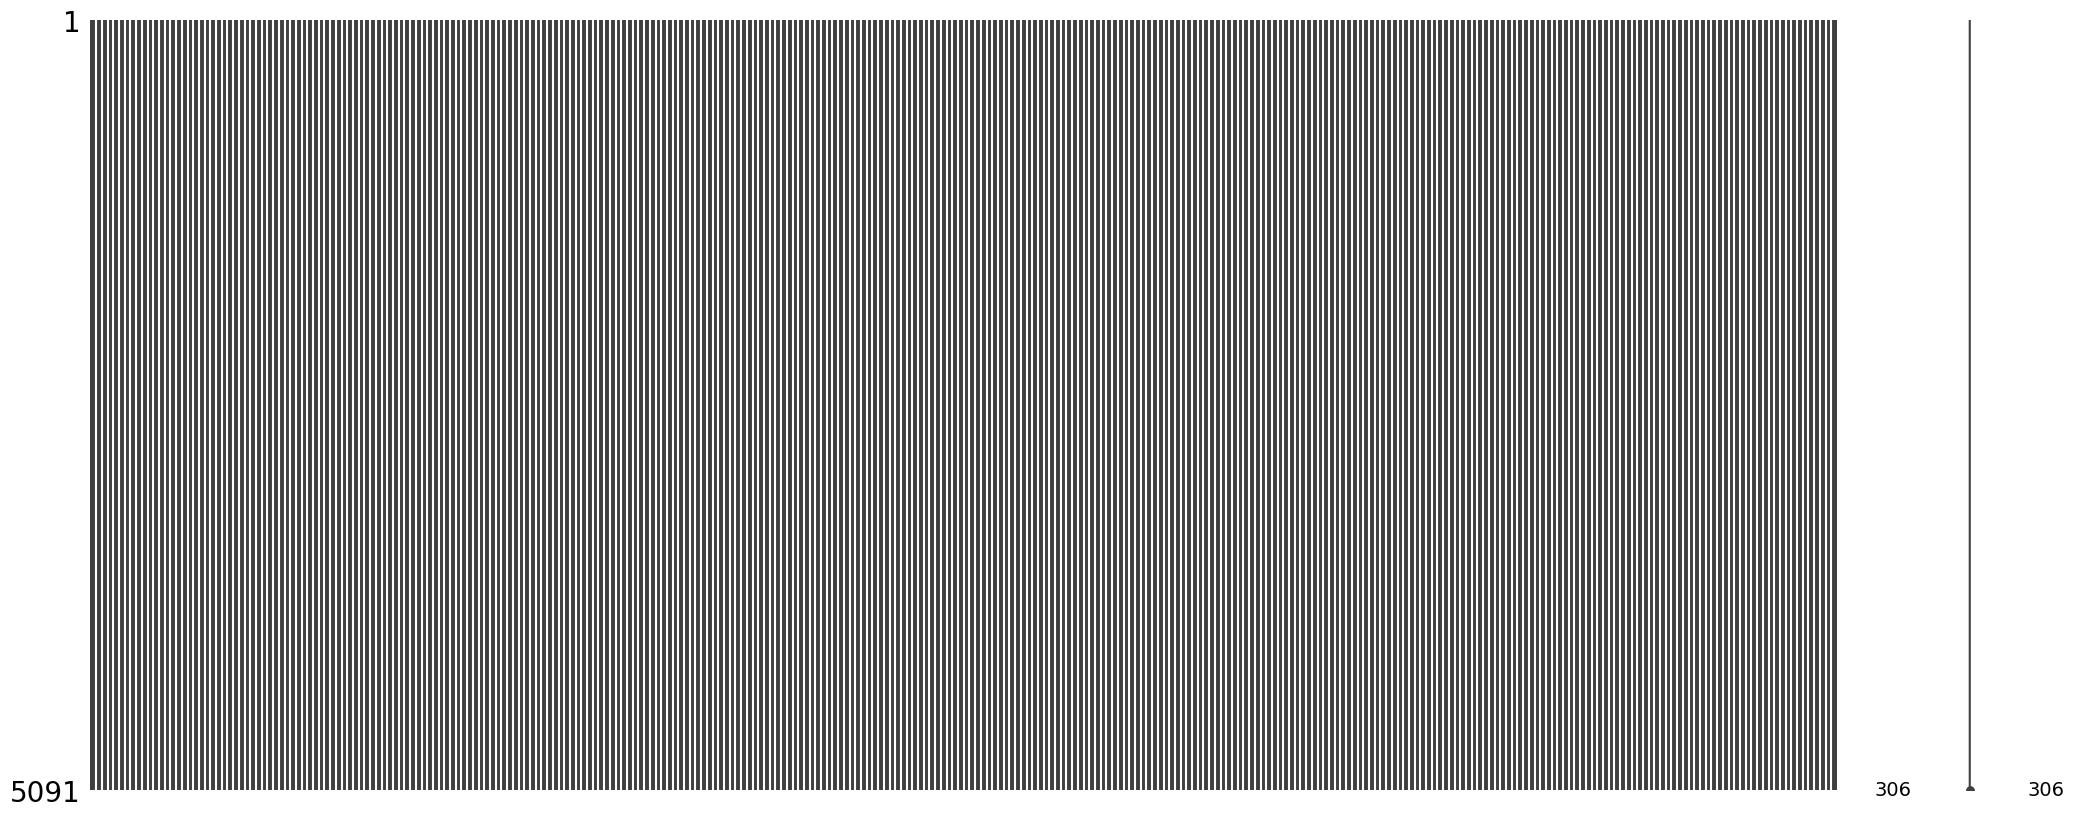

In [6]:
#the blank space in the matrix that gets plotted indicate the number of missing values visually
msno.matrix(signal);

In [7]:
signal.isnull().sum().sum()

0

In [8]:
signal.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5091.0,2011.011589,0.285303,2011.000000,2011.000000,2011.000000,2011.000000,2019.000000
dem_nasa_dem30,5091.0,703.000982,689.395483,-64.000000,178.500000,383.000000,1228.000000,3531.000000
dem_merit,5091.0,702.989512,689.818076,-62.485870,177.082237,382.266815,1228.776917,3521.041748
dem_gmted,5091.0,704.887056,689.329857,-62.000000,179.000000,384.000000,1230.000000,3523.000000
dem_srtm90_v4,5091.0,704.098409,689.650488,-64.000000,179.000000,383.000000,1229.000000,3580.000000
...,...,...,...,...,...,...,...,...
sur_refl_b01_std_sampling_year,5091.0,1065.661213,1005.472648,44.805950,222.691322,639.540645,1741.368234,3867.800669
sur_refl_b02_std_sampling_year,5091.0,1068.488921,618.375897,121.464499,588.573861,924.875167,1392.175076,3193.912846
sur_refl_b03_std_sampling_year,5091.0,1036.451850,1079.210268,25.795410,107.901579,649.356386,1767.075432,4049.046509
sur_refl_b07_std_sampling_year,5091.0,453.205834,197.820808,72.230034,305.694851,415.923707,572.038427,1249.752010


In [9]:
column=signal.columns

In [10]:
nunique = signal.apply(pd.Series.nunique)
nunique

year                                 4
dem_nasa_dem30                    1800
dem_merit                         5085
dem_gmted                         1811
dem_srtm90_v4                     1779
                                  ... 
sur_refl_b01_std_sampling_year    5083
sur_refl_b02_std_sampling_year    5083
sur_refl_b03_std_sampling_year    5073
sur_refl_b07_std_sampling_year    5074
soc_stock_t_ha                    5091
Length: 306, dtype: int64

In [11]:
# Create correlation matrix
corr_matrix = signal.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop1 = [column for column in upper.columns if any(upper[column] < -0.95)]
to_drop2 = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop1)
print(to_drop2)
drop=to_drop1+to_drop2

[]
['dem_merit', 'dem_gmted', 'dem_srtm90_v4', 'dem_nasa_srtm30', 'dem_usgs_ned', 'soil_olm_bd_b10', 'soil_olm_bd_b30', 'soil_olm_bd_b100', 'soil_olm_clay_b10', 'soil_olm_clay_b100', 'soil_olm_ph_b10', 'soil_olm_ph_b30', 'soil_olm_ph_b60', 'soil_olm_ph_b100', 'soil_olm_sand_b10', 'soil_olm_sand_b30', 'soil_olm_sand_b60', 'soil_olm_sand_b100', 'soil_olm_water_content_b10', 'soil_olm_water_content_b100', 'soil_grids_bdod_15_30', 'soil_grids_cec_15_30', 'soil_grids_cec_30_60', 'soil_grids_cec_60_100', 'soil_grids_clay_5_15', 'soil_grids_clay_60_100', 'soil_grids_phh2o_5_15', 'soil_grids_phh2o_15_30', 'soil_grids_phh2o_30_60', 'soil_grids_phh2o_60_100', 'soil_grids_cfvo_5_15', 'soil_grids_cfvo_15_30', 'soil_grids_cfvo_30_60', 'soil_grids_cfvo_60_100', 'soil_grids_sand_5_15', 'soil_grids_sand_15_30', 'soil_grids_sand_30_60', 'soil_grids_sand_60_100', 'soil_grids_silt_5_15', 'soil_grids_silt_15_30', 'soil_grids_silt_30_60', 'soil_grids_silt_60_100', 'soil_grids_soc_60_100', 'soil_grids_nitro

In [12]:
df=signal.drop(drop,1)
df.shape

/tmp/ipykernel_4738/1548877416.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df=signal.drop(drop,1)


(5091, 189)

In [13]:
from scipy import stats

def outliers_high(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat > q3+ stats.iqr(feat),q2,feat)
    return feat

def outliers_low(feat):
    q1= feat.quantile(.25)
    q2= feat.quantile(.5)
    q3= feat.quantile(.75)
    feat = np.where(feat < q1 - stats.iqr(feat),q2,feat)
    return feat

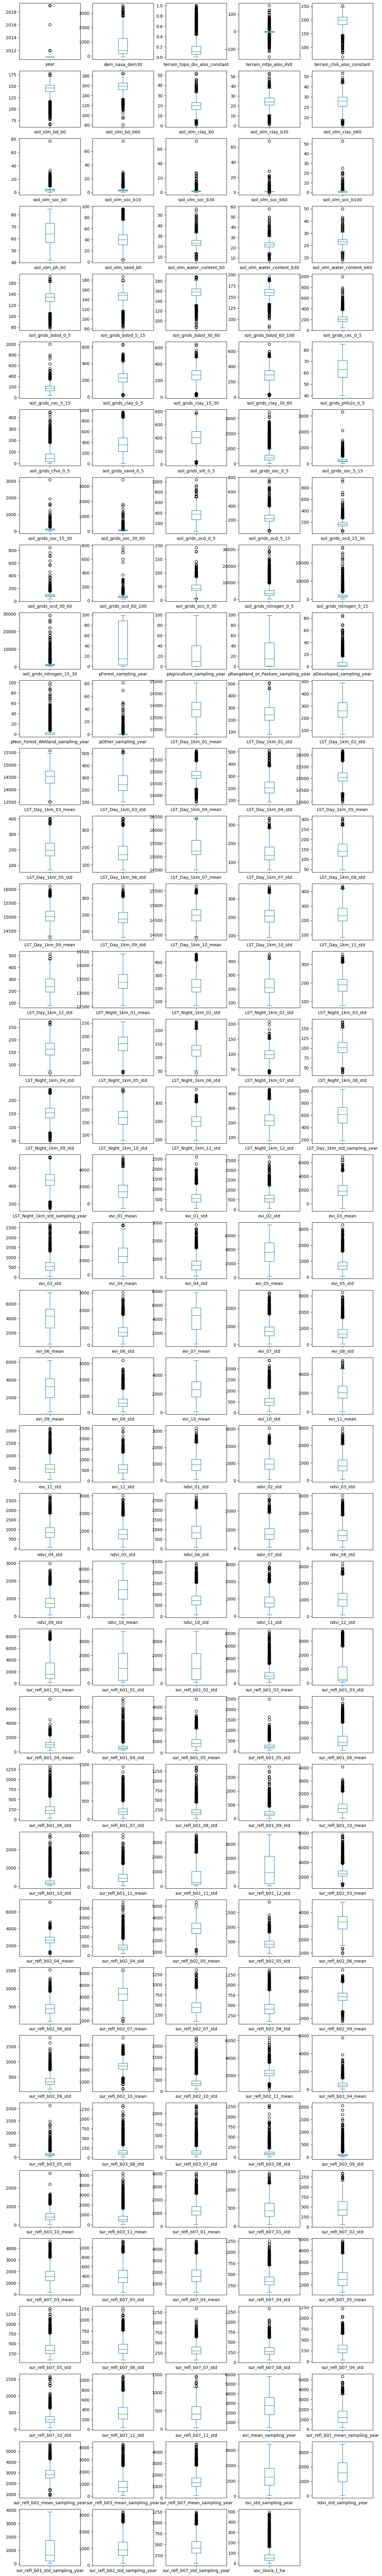

In [14]:
df.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [15]:
features=df.copy()
for column in df:
    features[column] = outliers_high(features[column])
    features[column] = outliers_low(features[column])

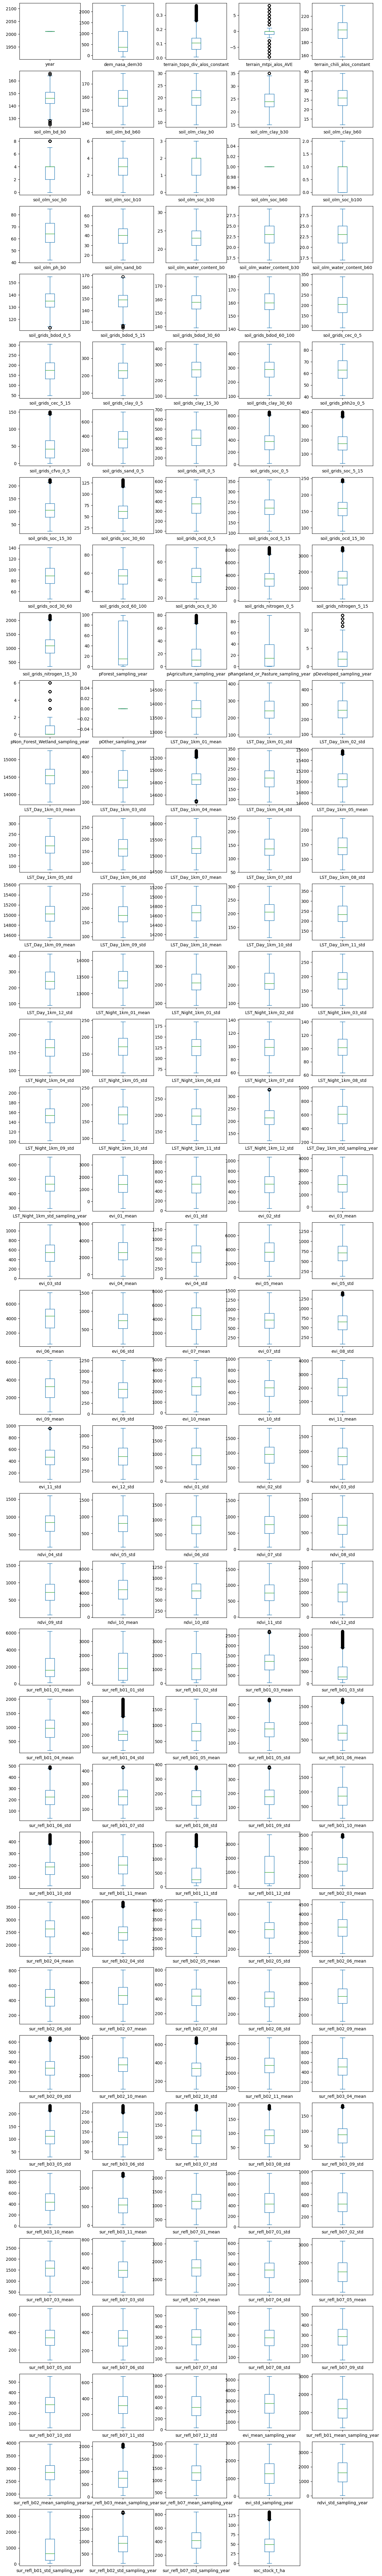

In [16]:
features.plot(kind='box', subplots=True,layout=(52,5), fontsize=10, figsize=(15,150));

In [17]:
feature=features.drop("soc_stock_t_ha",1)
y=features["soc_stock_t_ha"]
col=list(feature.columns)

/tmp/ipykernel_4738/3355252194.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  feature=features.drop("soc_stock_t_ha",1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_feature = scaler.fit_transform(feature)
scaled_feature = pd.DataFrame(scaled_feature,columns=col)

In [19]:
from sklearn.decomposition import PCA

# Creating a covariance matrix

cov_matrix = np.cov(scaled_feature.T)
print('Covariance Matrix \n', cov_matrix)
      
#perform an eigendecomposition on the covariance matrix:

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)  

Covariance Matrix 
 [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.06789504  0.00981378 ...  0.0204854   0.00860772
   0.01649197]
 [ 0.          0.00981378  0.04651628 ...  0.0021682   0.00266658
  -0.00452667]
 ...
 [ 0.          0.0204854   0.0021682  ...  0.0748135   0.04881527
   0.03006308]
 [ 0.          0.00860772  0.00266658 ...  0.04881527  0.05100943
   0.02134332]
 [ 0.          0.01649197 -0.00452667 ...  0.03006308  0.02134332
   0.04631285]]


In [20]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 22.18373933  39.1744272   48.58919316  52.14283937  55.47750713
  58.04849164  60.02563795  61.84865401  63.36437887  64.79661796
  66.08519252  67.31439948  68.36244142  69.29023468  70.1428424
  70.92672445  71.65779695  72.37100404  73.06247133  73.68837747
  74.29668172  74.88785078  75.46276691  76.03127323  76.56885703
  77.09091385  77.60568403  78.07502155  78.539819    78.99059904
  79.42840118  79.85429547  80.2553302   80.64406379  81.02212074
  81.39074619  81.74641163  82.09809343  82.44201458  82.77775263
  83.10469843  83.42556848  83.74081865  84.04687274  84.3458495
  84.63786622  84.9198502   85.19455669  85.46691449  85.73331651
  85.99112466  86.24510322  86.49107984  86.72909818  86.9632056
  87.19290589  87.41981235  87.64358259  87.86457717  88.0819307
  88.29553432  88.5040436   88.7067781   88.90886276  89.10644487
  89.30007636  89.49114034  89.67866044  89.86172481  90.04093608
  90.21740388  90.39131845  90.56112209  90.729666

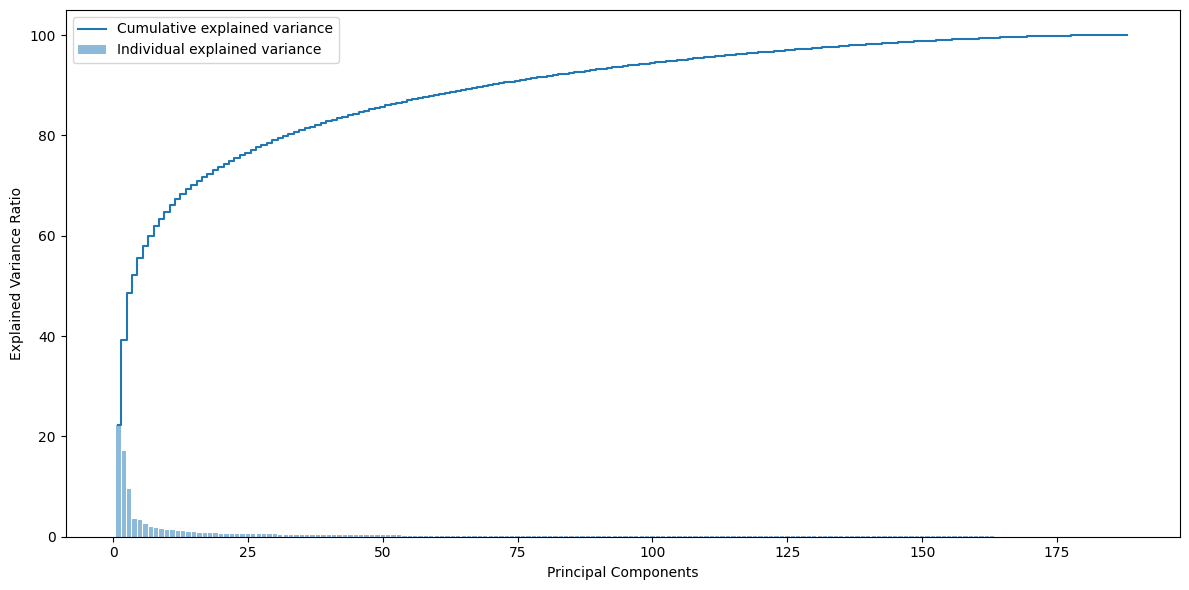

In [21]:
plt.figure(figsize=(12 ,6))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show() 

In [22]:
pca = PCA(n_components=scaled_feature.shape[1],random_state=1).fit(scaled_feature.values)
a = np.cumsum(pca.explained_variance_ratio_)

In [23]:
i = 0
while a[i] < 0.99:
    i = i+1
f'Number of dimensions needed to capture 99%% of variance:{i}'

'Number of dimensions needed to capture 99%% of variance:153'

In [24]:
# PCA with reduced number of components

pca = PCA(n_components=i,random_state=1)
pca.fit(scaled_feature)
print(pca.components_)

pca_df= pd.DataFrame(pca.fit_transform(scaled_feature))

[[ 1.06905038e-18  1.15589499e-01 -1.02920031e-02 ...  1.21290606e-01
   6.42247774e-02  9.83286362e-02]
 [-1.12936283e-18  5.40201556e-02 -1.51322309e-02 ... -1.16053231e-01
  -1.09666152e-01 -3.02221816e-02]
 [-9.28191625e-19  9.54304624e-02  9.55867337e-02 ...  1.95097243e-02
   5.38162008e-03 -5.36176779e-02]
 ...
 [-1.54247825e-18 -4.12111193e-02 -1.00175912e-02 ...  5.79229280e-02
  -5.56935010e-02 -1.68638257e-02]
 [-2.50998943e-17 -5.88754497e-02 -2.37085412e-03 ...  4.86860920e-04
   4.10059072e-02  3.07860322e-02]
 [-7.36416454e-18 -2.78897846e-02 -8.77384266e-03 ...  8.58600171e-02
  -3.60626830e-02 -1.99891119e-03]]


In [25]:
pca_df.shape

(5091, 153)

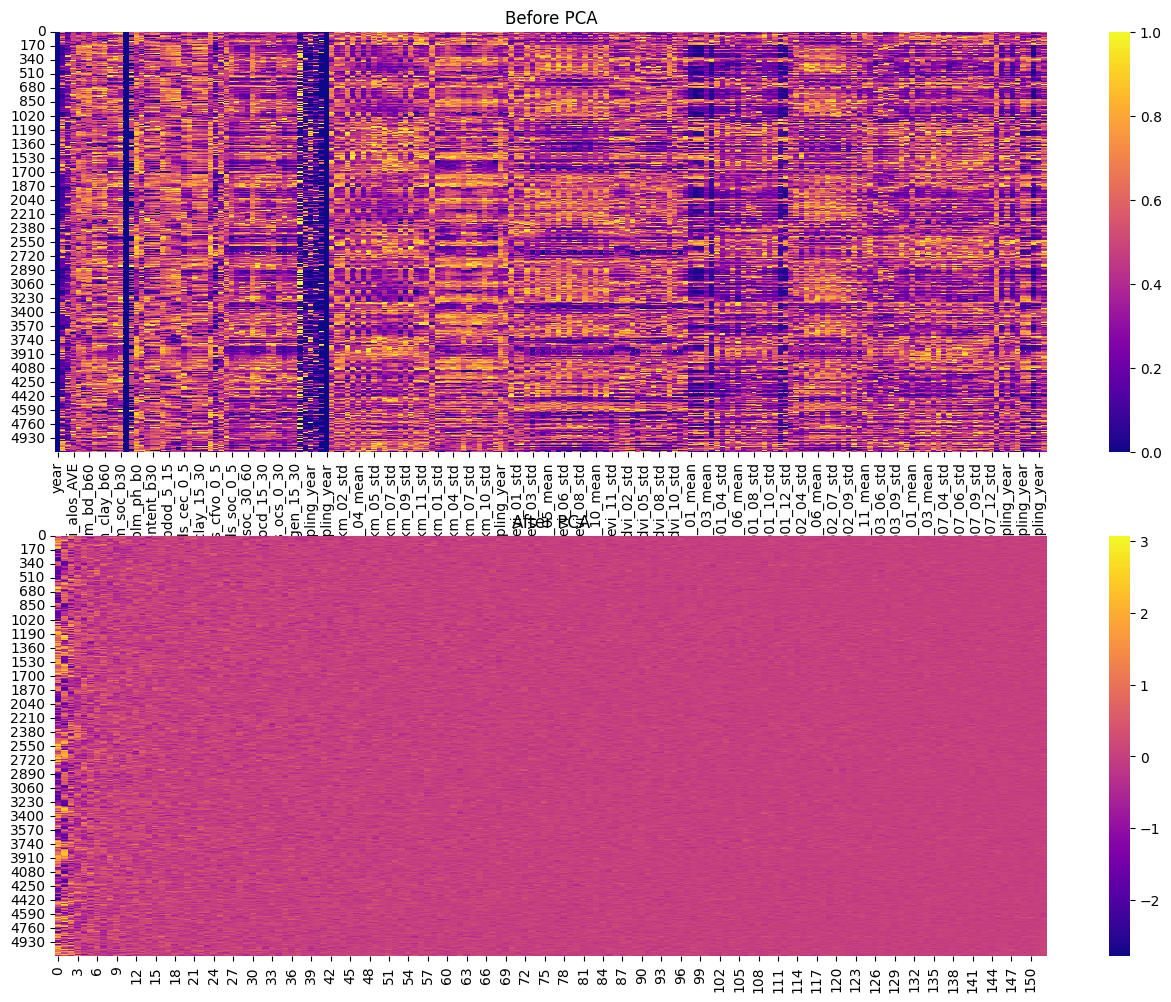

In [26]:
f, (ax_heatmap, ax_heatmap2) = plt.subplots(2,figsize=(16,12))
ax_heatmap.set_title('Before PCA')
ax_heatmap2.set_title('After PCA')

sns.heatmap(scaled_feature,ax=ax_heatmap,cmap='plasma');
sns.heatmap(pca_df,ax=ax_heatmap2,cmap='plasma');

In [27]:
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size =0.2,random_state =1)

In [28]:
sc=StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [29]:
regr = MLPRegressor(hidden_layer_sizes=(50,50,20), activation='relu', solver='adam', alpha=0.0001, batch_size=1000,
                    learning_rate='adaptive', learning_rate_init=0.001, power_t=0.5, max_iter=500,
                    shuffle=True, random_state=1, tol=0.0001, verbose=10, warm_start=True,
                    momentum=0.9, nesterovs_momentum=True, early_stopping=True, validation_fraction=0.2,
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=100)

In [30]:
regr.fit(trainX_scaled, y_train)

Iteration 1, loss = 1611.57101190
Validation score: -3.132053
Iteration 2, loss = 1590.37829540
Validation score: -3.081107
Iteration 3, loss = 1570.37054933
Validation score: -3.028881
Iteration 4, loss = 1549.05220694
Validation score: -2.970550
Iteration 5, loss = 1524.54762870
Validation score: -2.900000
Iteration 6, loss = 1495.14229764
Validation score: -2.813469
Iteration 7, loss = 1458.69750337
Validation score: -2.707714
Iteration 8, loss = 1414.25466377
Validation score: -2.579177
Iteration 9, loss = 1360.04480782
Validation score: -2.424560
Iteration 10, loss = 1295.08701384
Validation score: -2.241226
Iteration 11, loss = 1218.41359110
Validation score: -2.028428
Iteration 12, loss = 1129.16693674
Validation score: -1.786624
Iteration 13, loss = 1028.42213964
Validation score: -1.518431
Iteration 14, loss = 916.84719377
Validation score: -1.230995
Iteration 15, loss = 799.62640881
Validation score: -0.933755
Iteration 16, loss = 679.66450931
Validation score: -0.640754
Iter

MLPRegressor(batch_size=1000, early_stopping=True,
             hidden_layer_sizes=(50, 50, 20), learning_rate='adaptive',
             max_iter=500, n_iter_no_change=100, random_state=1,
             validation_fraction=0.2, verbose=10, warm_start=True)

In [31]:
regr.score(trainX_scaled, y_train)

0.5385514633628609

In [32]:
regr.score(testX_scaled, y_test)

0.2603250410578841

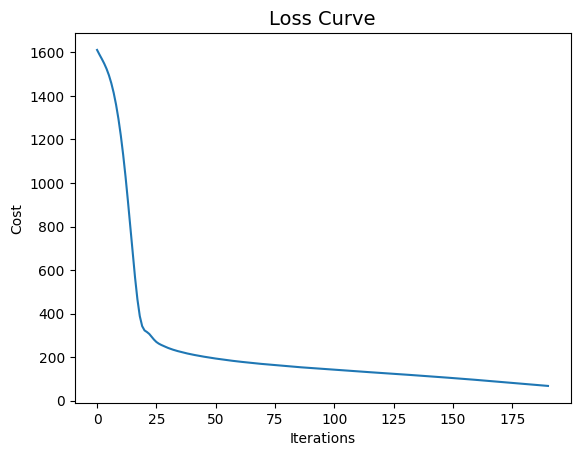

In [33]:
plt.plot(regr.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()